In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Lecture 24##

## Chebyshev's Bounds ##

In [4]:
births = Table.read_table('baby.csv')

In [10]:
births.labels

SyntaxError: invalid syntax (<ipython-input-10-833b5c040bf7>, line 2)

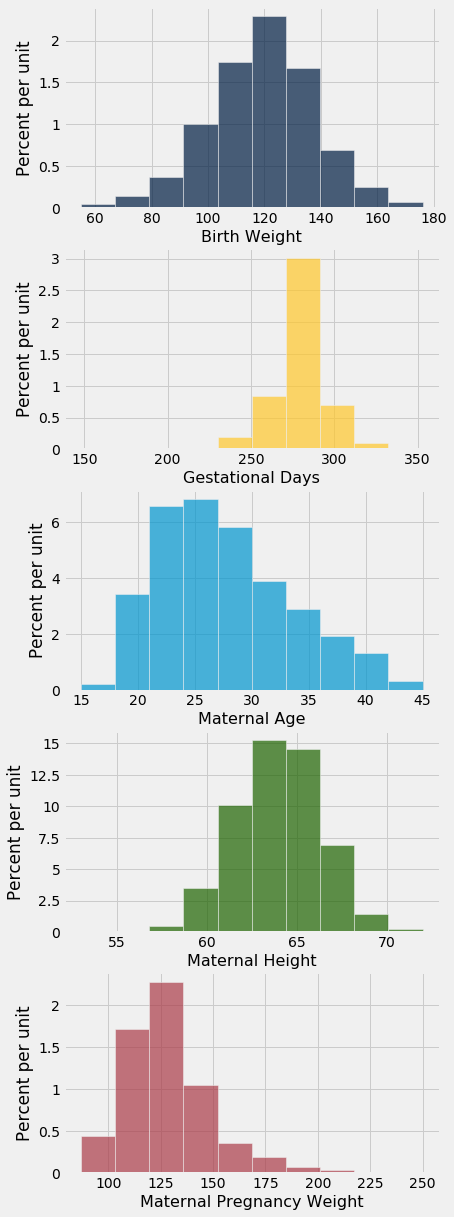

In [11]:
births.select(births.labels[:-1]).hist(overlay = False)

In [12]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.72544970428041)

In [13]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [14]:
within_3_SDs.num_rows/births.num_rows

0.9863713798977853

In [15]:
1 - 1/9

0.8888888888888888

In [ ]:
# See if Chebyshev's bounds work for different distributions

for k in births.labels:
    values = births.column(k)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(2, 6):
        chosen = births.where(k, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows/births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')

## Standard Units ##

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [ ]:
ages = births.column('Maternal Age')

In [ ]:
ages_standard_units = standard_units(ages)

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

In [ ]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

In [ ]:
np.mean(ages), np.std(ages)

In [ ]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

In [ ]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves ##

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

In [ ]:
births.hist('Birth Weight')

In [ ]:
bw = births.column('Birth Weight')
mean_w = np.mean(bw)
sd_w = np.std(bw)
mean_w, sd_w

## Central Limit Theorem ##

In [ ]:
red_winnings = np.append(1*np.ones(18), -1*np.ones(20))
red = Table().with_columns('Winnings on Red', red_winnings)

In [ ]:
red.show()

In [ ]:
red.hist(bins = np.arange(-1.5, 1.6, 1))

In [ ]:
18/38

In [ ]:
num_bets = 100

net_gains = make_array()

for i in np.arange(20000):
    spins = red.sample(num_bets)
    new_net_gain = sum(spins.column('Winnings on Red'))
    net_gains = np.append(net_gains, new_net_gain)
 

In [ ]:
Table().with_columns('Net Gain', net_gains).hist()
plots.xticks(np.arange(-45, 36, 10));

In [ ]:
np.average(net_gains)

In [ ]:
united = Table.read_table('united_summer2015.csv')
united

In [ ]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [ ]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

In [ ]:
united = united.with_columns(
    'Delay in Standard Units', standard_units(delays)
)
united.sort('Delay', descending=True)

In [ ]:
chosen = united.where('Delay in Standard Units', are.between(-3, 3))
chosen.num_rows/united.num_rows

In [ ]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

### Simulate Sample Mean ###

In [ ]:
sample_size = 400

means = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)

In [ ]:
Table().with_columns('Sample Mean', means).hist(bins = 20)
plots.title('Sample Means: Sample Size ' + str(sample_size))
plots.xlabel('Random Sample Mean');